In [1]:
import numpy as np
from numpy import genfromtxt

import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import GPy

In [2]:
#loading the data.
path = r"C:\Users\mikep\Desktop\project\data\final"

Xtrain = genfromtxt(path+"\Xtrain.csv", delimiter=',', skip_header=1)
Xtest = genfromtxt(path+"\Xtest.csv", delimiter=',', skip_header=1)

Ytrain = genfromtxt(path+"\Ytrain.csv", delimiter=',', skip_header=1)
Ytest = genfromtxt(path+"\Ytest.csv", delimiter=',', skip_header=1)

Ytrain = np.array([Ytrain]).T
Ytest = np.array([Ytest]).T

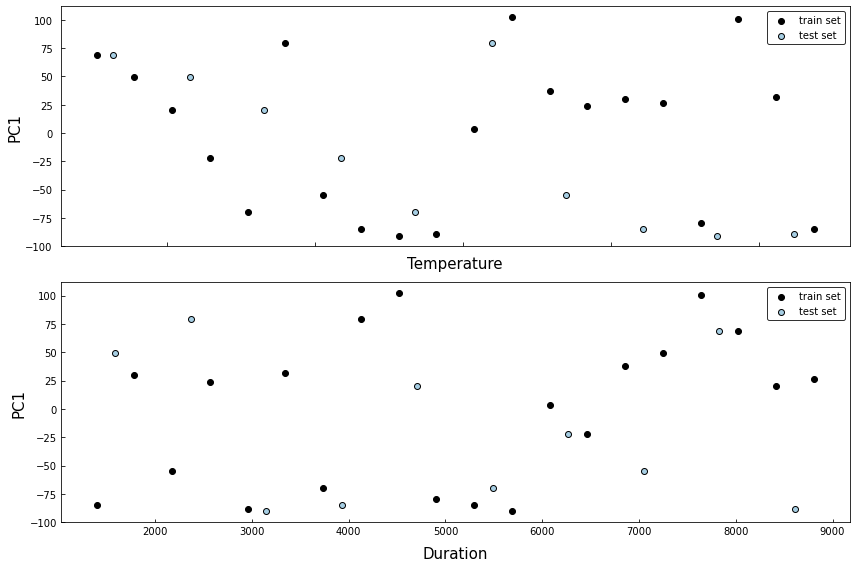

In [3]:
#visualizing data

#plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(2, figsize=(12, 8))

ax[0].scatter(x = Xtrain[:,0], y = Ytrain, marker='o', c='black', edgecolor='black', label='train set')
ax[0].scatter(x = Xtest[:,0], y = Ytest, marker='o', c='#a6cee3', edgecolor='black', label='test set')

ax[0].set_xlabel("Temperature", fontsize=15, labelpad=10, horizontalalignment='center')
ax[0].set_ylabel("PC1", fontsize=15, labelpad=3, horizontalalignment='center')

ax[0].tick_params(labelbottom=False, size=4, direction="in", pad=8)

###====###

ax[1].scatter(x = Xtrain[:,1], y = Ytrain, marker='o', c='black', edgecolor='black', label='train set')
ax[1].scatter(x = Xtest[:,1], y = Ytest, marker='o', c='#a6cee3', edgecolor='black', label='test set')

ax[1].set_xlabel("Duration", fontsize=15, labelpad=10, horizontalalignment='center')
ax[1].set_ylabel("PC1", fontsize=15, labelpad=3, horizontalalignment='center')

###====###

ax[0].tick_params(axis='both', which='both', labelsize=10)
ax[1].tick_params(axis='both', which='both', labelsize=10)

plt.tick_params(axis="both", direction="in")

ax[0].legend(loc='best', fontsize=10, edgecolor='black')
ax[1].legend(loc='best', fontsize=10, edgecolor='black')

plt.tight_layout()
#fig.savefig(r"C:\Users\mikep\Desktop\thesis\figures\data-visualization.png", facecolor='w', dpi=600)
plt.show()

In [91]:
# 2-D kernel

k = GPy.kern.RBF(2, active_dims=[0,1], lengthscale=200, variance= 100)

# gp model
m = GPy.models.GPRegression(Xtrain, Ytrain, k)

#fix gaussian noise variance
m.Gaussian_noise.variance = 0 
m.Gaussian_noise.variance.fix()
#m.kern.lengthscale=172.62344365134467

print(m)


Name : GP regression
Objective : 493.26667125349064
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |  100.0  |      +ve      |        
  rbf.lengthscale          |  200.0  |      +ve      |        
  Gaussian_noise.variance  |    0.0  |   +ve fixed   |        


```
k = GPy.kern.RBF(2, ARD=True)

k = GPy.kern.RBF(1, active_dims=[0]) * GPy.kern.RBF(1, active_dims=[1])

k = GPy.kern.RBF(1, active_dims=[0]) * GPy.kern.Matern32(1, active_dims=[1])
```

In [79]:
# plotting the covariance function

def plot_kern(kernel):
    z = []
    x = []
    y = []
    for n_value in n:
        for e0_value in e0:
            x.append(n_value)
            y.append(e0_value)
            z.append(kernel.K(np.array([[n_value,e0_value],[1.,1.]]))[0][1])

    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    
    ax.plot_trisurf(x, y, z,
                    linewidth = 1,
                    antialiased = True,
                    cmap='coolwarm');
    plt.tight_layout()
    #plt.savefig(r'C:\Users\mikep\Desktop\thesis\figures\kernel.png', facecolor='w', dpi=600)
    #plt.title("Covariance Function", fontsize=25)
    plt.show()

e0 = np.linspace(-4000, 4000, 200)
n = np.linspace(-4000, 4000, 200)

#plot_kern(k)

200 ---> 170

In [80]:
# optimization
m.optimize()
m.optimize_restarts(10, robust=True)

print(m)
#print(m.rbf.lengthscale)

Optimization restart 1/10, f = 111.83510174523003
Optimization restart 2/10, f = 111.83509758444204
Optimization restart 3/10, f = 111.83509158335207
Optimization restart 4/10, f = 111.83510660799865
Optimization restart 5/10, f = 111.83511343850826
Optimization restart 6/10, f = 111.83509108745127
Optimization restart 7/10, f = 111.83509175210624
Optimization restart 8/10, f = 111.83511950177717
Optimization restart 9/10, f = 111.83509981519171
Optimization restart 10/10, f = 111.83510321001042

Name : GP regression
Objective : 111.83509108745127
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |   4210.582556157347  |      +ve      |        
  rbf.lengthscale          |  0.7782948509963886  |      +ve      |        
  Gaussian_noise.variance  |                 0.0  |   +ve fixed   |        


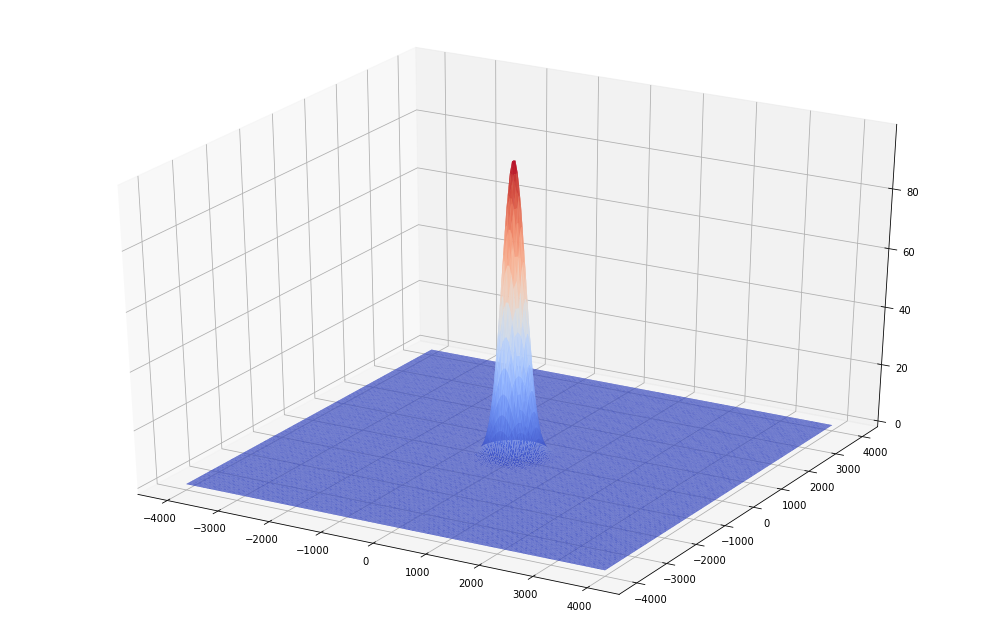

In [92]:
plot_kern(k)

In [93]:
# creating a grid
[Xi, Xj] = np.meshgrid(np.linspace(850, 1150, 200), np.linspace(1200, 9000, 2500))
# augmenting our grid to be a list of coordinates
Xnew = np.vstack((Xi.ravel(), Xj.ravel())).T # Change our input grid to list of coordinates

In [94]:
# calculate the mean and the covariance at the grid
mean, Cov = m.predict_noiseless(Xnew, full_cov=False)

GP_regression.,value,constraints,priors
rbf.variance,100.0,+ve,
rbf.lengthscale,200.0,+ve,
Gaussian_noise.variance,0.0,+ve fixed,


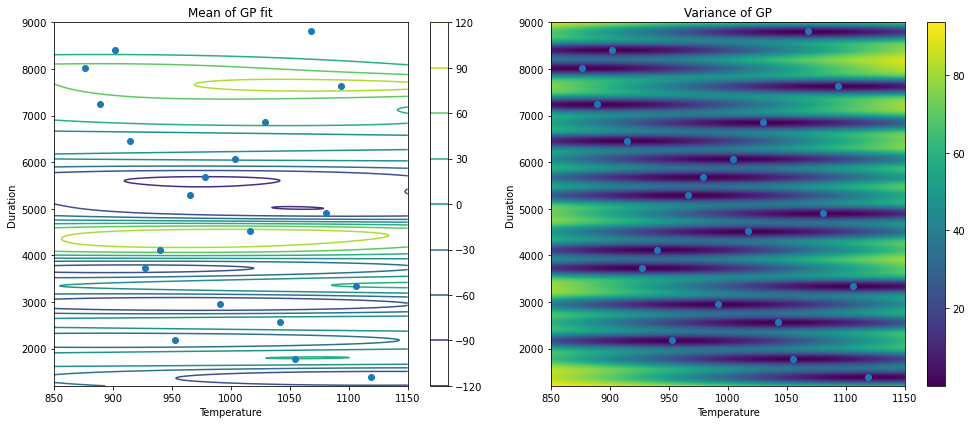

In [95]:
# plotting environment
plt.figure(figsize=(14, 6))

# left plot - mean of gp fit
plt.subplot(121)

# mean surface
plt.contour(Xi, Xj, mean.reshape(Xi.shape))

# sample locations
plt.plot(Xtrain[:, 0], Xtrain[:, 1], 'o') #, plt.axis("square")

# annotations
plt.xlabel("Temperature"), plt.ylabel("Duration")
plt.title("Mean of GP fit"), plt.colorbar()

# right plot - variance of the gp
plt.subplot(122)

# variance surface
plt.pcolor(Xi, Xj, Cov.reshape(Xi.shape))

# sample locations
plt.plot(Xtrain[:,0], Xtrain[:,1], 'o')#, plt.axis("square")

# annotations
plt.xlabel("Temperature"), plt.ylabel("Duration")
plt.title("Variance of GP"), plt.colorbar()

plt.tight_layout()
#plt.show()

m

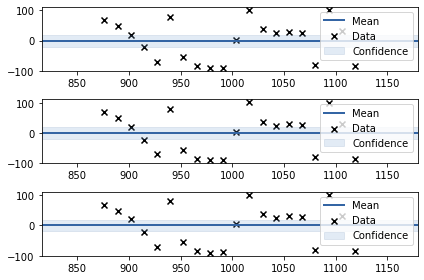

In [96]:
slices = [100, 200, 300]
figure = GPy.plotting.plotting_library().figure(3, 1)

for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1, y)], row=(i+1), plot_data=True)

In [90]:
def plot_gp(X, m, C, training_points=None):
    """ Plotting utility to plot a GP fit with 95% confidence interval """
    # Plot 95% confidence interval 
    plt.fill_between(X[:,0],
                     m[:,0] - 1.96*np.sqrt(np.diag(C)),
                     m[:,0] + 1.96*np.sqrt(np.diag(C)),
                     alpha=0.5)
    # Plot GP mean and initial training points
    plt.plot(X, m, "-")
    plt.legend(labels=["GP fit"])
    
    plt.xlabel("X"), plt.ylabel("Function")
    
    # Plot training points if included
    if training_points is not None:
        X_, Y_ = training_points
        plt.plot(X_, Y_, "kx", mew=2)
        plt.legend(labels=["GP fit", "sample points"])

In [ ]:
plt.figure(figsize=(12, 5))

# Plot the GP fit mean and covariance
plot_gp(Xtrain[:, 0], mean, Cov) #,training_points=(Xtrain[:,0], Ytrain))
plt.title("Regression Model Fit")

In [ ]:
# Compare kernels

In [ ]:
# Metrics

In [ ]:
# Slices